In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Prerequisite

In [2]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-sa8dtkyz
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-sa8dtkyz
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit afd9cfd062b60ca1ba8d7c9daef7dc820489db0a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl 

## Test script

In [3]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):

  """
  Predicts and plots cryptocurrency data for multiple coins.

  Args:
      crypto_data_dict: Dictionary containing data for each cryptocurrency.
          Keys should be coin names (e.g., 'BTC', 'ETH'), values should be file paths to CSV data.
      model_name: Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
      prediction_length: Number of future data points to predict (default: 12).
      num_samples: Number of prediction samples to generate (default: 20).
  """

  # Check if coin exists in data
  if coin_name not in crypto_data_dict:
      raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")


  # Initialize Chronos pipeline once outside the loop for efficiency
  pipeline = ChronosPipeline.from_pretrained(
      model_name,
      device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
      torch_dtype=torch.bfloat16,
  )

  predictions = {}  # Create an empty dictionary to store results

  for coin_name, csv_file in crypto_data_dict.items():
    # Load data for the specific coin
    csv_file = crypto_data_dict[coin_name]
    df = pd.read_csv(csv_file)


    # Perform prediction
    forecast = pipeline.predict(
        context=torch.tensor(df["Close"]),
        prediction_length=prediction_length,
        num_samples=num_samples,
    )

    # Generate forecast index for plotting
    forecast_index = range(len(df), len(df) + prediction_length)
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

    predictions[coin_name] = {  # Add results to the dictionary
          "median": median,
          "low": low,
          "high": high
      }


    # Plot and visualize predictions (replace with your desired plotting logic)
    plt.plot(df["Close"], label="Actual")
    plt.plot(forecast_index, median, label="Median Prediction")
    plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
    plt.title(f"Predicted {coin_name} Prices")
    plt.legend()
    plt.show()

  return predictions  # Return the dictionary containing predictions

# Example usage
crypto_data = {
  'BTC' : "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
  'BNB' : "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
  'ETH' : "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}




In [4]:
crypto_predictions = predict_and_plot_crypto_data(crypto_data)

# Access predictions for a specific coin (e.g., 'BTC')
btc_predictions = crypto_predictions['BTC']



TypeError: predict_and_plot_crypto_data() missing 1 required positional argument: 'crypto_data_dict'

In [ ]:
# Print the median predicted values for all coins
for coin, prediction in crypto_predictions.items():
  print(f"Coin: {coin}, Median Prediction: {prediction['median']}")

In [ ]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np


# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):
  """
  Predicts and plots cryptocurrency data for a single coin.

  Args:
      coin_name: Name of the cryptocurrency (e.g., 'BTC', 'ETH').
      crypto_data_dict: Dictionary containing data for each cryptocurrency.
          Keys should be coin names, values should be file paths to CSV data.
      model_name: Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
      prediction_length: Number of future data points to predict (default: 12).
      num_samples: Number of prediction samples to generate (default: 20).
  """



  # Check if coin exists in data
  if coin_name not in crypto_data_dict:
      raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")

  # Load data for the specified coin
  csv_file = crypto_data_dict[coin_name]
  df = pd.read_csv(csv_file)

  # Initialize Chronos pipeline (can be inside or outside depending on preference)
  pipeline = ChronosPipeline.from_pretrained(
      model_name,
      device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
      torch_dtype=torch.bfloat16,
  )

  # Perform prediction
  forecast = pipeline.predict(
      context=torch.tensor(df["Close"]),
      prediction_length=prediction_length,
      num_samples=num_samples,
  )

  # Generate forecast index for plotting
  forecast_index = range(len(df), len(df) + prediction_length)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

  # Plot and visualize predictions (replace with your desired plotting logic)
  plt.plot(df["Close"], label="Actual")
  plt.plot(forecast_index, median, label="Median Prediction")
  plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
  plt.title(f"Predicted {coin_name} Prices")
  plt.legend()
  plt.show()


In [ ]:
# Example usage (assuming crypto_data_dict is defined)
predict_and_plot_crypto_data('BTC', crypto_data_dict)  # Call for Bitcoin

## Final script

In [5]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np


# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):
    """
    Predicts and plots cryptocurrency data for a single coin.

    Args:
        coin_name (str): Name of the cryptocurrency (e.g., 'BTC', 'ETH').
        crypto_data_dict (dict): Dictionary containing data for each cryptocurrency.
            Keys should be coin names, values should be file paths to CSV data.
        model_name (str): Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
        prediction_length (int): Number of future data points to predict (default: 12).
        num_samples (int): Number of prediction samples to generate (default: 20).

    Raises:
        ValueError: If coin_name is not found in crypto_data_dict.

    Returns:
        tuple: Tuple containing forecast index and median prediction array.
    """

    # Check if coin exists in data
    if coin_name not in crypto_data_dict:
        raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")

    # Load data for the specified coin
    csv_file = crypto_data_dict[coin_name]
    df = pd.read_csv(csv_file)

    # Initialize Chronos pipeline
    pipeline = ChronosPipeline.from_pretrained(
        model_name,
        device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
        torch_dtype=torch.bfloat16,
    )

    # Perform prediction
    forecast = pipeline.predict(
        context=torch.tensor(df["Close"]),
        prediction_length=prediction_length,
        num_samples=num_samples,
    )

    # Generate forecast index for plotting
    forecast_index = range(len(df), len(df) + prediction_length)
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

    # Plot and visualize predictions
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(df["Close"], label="History")
    plt.plot(forecast_index, median, label="Median Prediction")
    plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
    plt.title(f"Predicted {coin_name} Prices")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)  # Add gridlines
    plt.show()

    return forecast_index, median  # Optionally return forecast data for further use


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

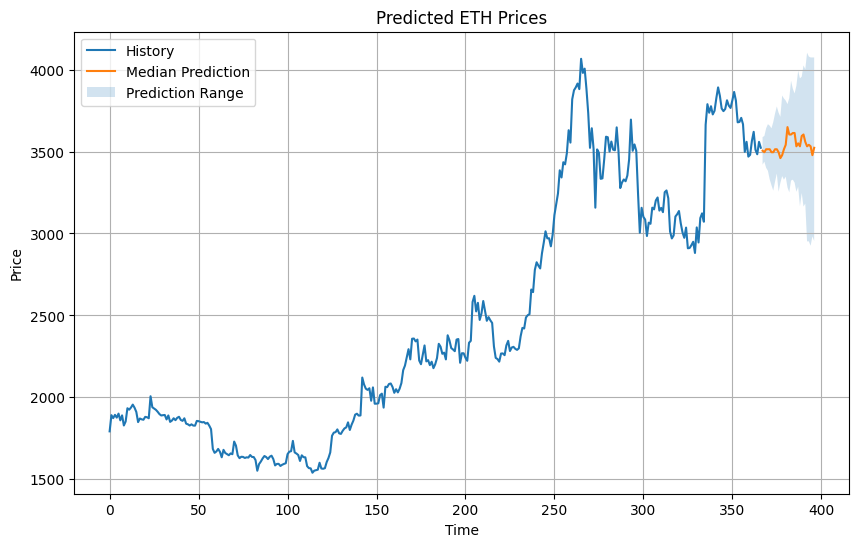

(range(367, 397),
 array([3505.23374465, 3496.22272314, 3514.24476617, 3514.24476617,
        3514.24476617, 3496.22286966, 3496.22286966, 3514.24461965,
        3514.24461965, 3496.22286966, 3460.17922314, 3478.20097314,
        3514.24476617, 3541.27739117, 3649.40789116, 3604.35351617,
        3604.35351617, 3613.36439117, 3613.36439117, 3532.26636965,
        3550.28826617, 3532.26636965, 3595.34264117, 3604.35351617,
        3559.29914117, 3532.26636965, 3541.27739117, 3532.26636965,
        3478.20097314, 3523.25549465]))

In [6]:
predict_and_plot_crypto_data('ETH',crypto_data_dict, prediction_length=30)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


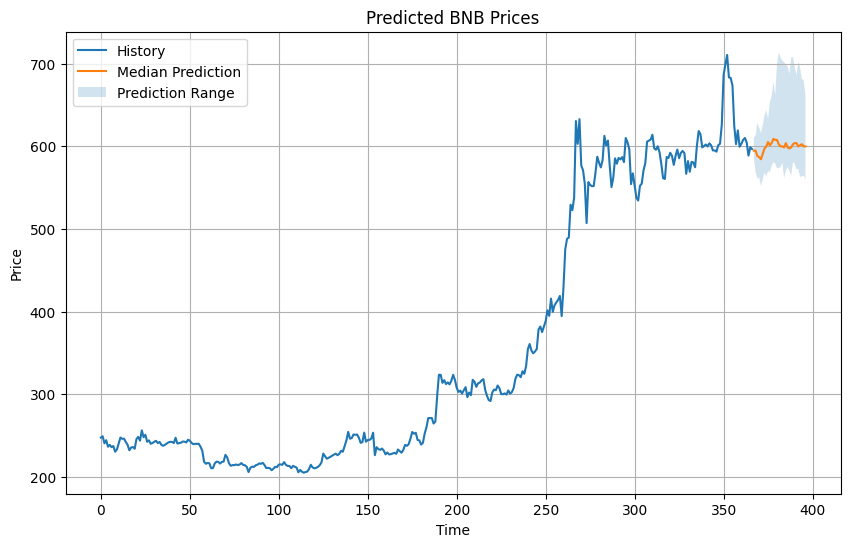

(range(367, 397),
 array([594.73070968, 594.73070968, 588.23798057, 586.93946431,
        584.34236844, 590.83507644, 597.32776332, 599.92485919,
        605.11900869, 601.22339656, 603.82047132, 609.01462082,
        607.71608345, 607.71608345, 602.52193394, 599.92485919,
        599.92485919, 598.62632181, 603.82047132, 598.62632181,
        597.32778443, 598.62632181, 602.52193394, 603.82047132,
        603.82047132, 599.92485919, 601.22339656, 602.52193394,
        599.92485919, 599.92485919]))

In [7]:
predict_and_plot_crypto_data('BNB',crypto_data_dict, prediction_length=30)

## Testing the accuracy

In [ ]:
# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

In [10]:
csv_file = crypto_data_dict['BNB']
bnb = pd.read_csv(csv_file)

bnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-20,242.881851,247.822693,239.018738,247.674438,247.674438,477391843
1,2023-06-21,247.682938,253.541931,245.548248,249.286346,249.286346,717670519
2,2023-06-22,249.276474,256.220032,240.052200,240.792435,240.792435,709030407
3,2023-06-23,240.792053,248.809784,240.094818,244.564941,244.564941,493157882
4,2023-06-24,244.553513,248.428619,231.994751,236.659653,236.659653,558809140


In [14]:
bnb['Date'].min(), bnb['Date'].max()

('2023-06-20', '2024-06-20')

In [15]:
bnb['Date'].dtypes

dtype('O')

In [ ]:
import pandas as pd
import numpy as np



bnb['Date'] = pd.to_Datetime(bnb['Date'])

num_days = (bnb['Date'].max() - bnb['Date'].min()) / np.timedelta64(1, 'D')  # for days
num_hours = (bnb['Date'].max() - bnb['Date'].min()) / np.timedelta64(1, 'h')  # for hours
print(num_days)
